## Project 2

In [49]:
import pandas as pd
import networkx as nx
import numpy as np
import networkx.algorithms.bipartite as bi

In [2]:
# parsing CSV
records = pd.read_csv("Crimes_-_2001_to_present.csv",nrows=800)

In [7]:
# adding code friendly column names
records.columns = ['ID', 'case_number', 'date', 'block', 'iucr',
       'primary_type', 'description', 'location_description', 'arrest',
       'domestic', 'beat', 'district', 'ward', 'community_area',
       'fbi_code', 'x_coordinate', 'y_coordinate', 'year', 'updated_on',
       'latitude', 'longitude', 'location']
records.head()

,ID,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,2082674,HH289429,04/06/2002 01:29:30 PM,056XX S CARPENTER ST,2027,NARCOTICS,POSS: CRACK,STREET,True,False,...,NaN,NaN,18,1170274.0,1867500.0,2002,04/15/2016 08:55:02 AM,41.791908,-87.651170,"(41.791908395, -87.651170238)"
1,2082678,HH308017,04/15/2002 07:24:00 AM,024XX S ARCHER AV,0820,THEFT,$500 AND UNDER,GAS STATION,True,False,...,NaN,NaN,06,1171590.0,1887793.0,2002,04/15/2016 08:55:02 AM,41.847566,-87.645749,"(41.847565598, -87.645749253)"
2,2082679,HH307385,04/14/2002 06:31:22 PM,112XX S WALLACE ST,1330,CRIMINAL TRESPASS,TO LAND,"SCHOOL, PUBLIC, BUILDING",False,False,...,NaN,NaN,26,1174313.0,1830380.0,2002,04/15/2016 08:55:02 AM,41.689957,-87.637461,"(41.68995741, -87.637460623)"
3,2154682,HH400487,05/27/2002 08:45:00 PM,029XX N KIMBALL AVE,0460,BATTERY,SIMPLE,STREET,True,False,...,35.0,21.0,08B,NaN,NaN,2002,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,2082680,HH307614,04/14/2002 11:20:00 PM,048XX N LAWNDALE AV,0530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,...,NaN,NaN,04A,1150850.0,1931842.0,2002,04/15/2016 08:55:02 AM,41.968871,-87.720711,"(41.96887071, -87.720711123)"


In [13]:
#create location listing
locations = records.location_description.unique()
locations = pd.DataFrame(locations,columns=['location_description'])
# create unique Id for location description
locations['ID'] = range(7000000,7000000+len(locations))
# shapshot of location descriptions
locations[1:3]

,location_description,ID
1,GAS STATION,7000001
2,"SCHOOL, PUBLIC, BUILDING",7000002


In [17]:
# create crime listing
crime = records.loc[:,['ID','case_number','block','primary_type','location_description']]
# merge the crime dataset and location Ids
crime = pd.merge(crime,locations,on="location_description")
crime.columns = ['ID', 'case_number', 'block', 'primary_type', 'location_description',
       'location_ID']
crime[1:3]

,ID,case_number,block,primary_type,location_description,location_ID
1,2154682,HH400487,029XX N KIMBALL AVE,BATTERY,STREET,7000000
2,2082680,HH307614,048XX N LAWNDALE AV,ASSAULT,STREET,7000000


In [21]:
# create relation list between each case and the location of the occurrence
edges =  crime.loc[:,['ID','location_ID','primary_type']]
edges[1:3]

,ID,location_ID,primary_type
1,2154682,7000000,BATTERY
2,2082680,7000000,ASSAULT


Create Graph

In [59]:
crime = records.loc[:,['ID','case_number','block']]

In [60]:
crime.head()

,ID,case_number,block
0,2082674,HH289429,056XX S CARPENTER ST
1,2082678,HH308017,024XX S ARCHER AV
2,2082679,HH307385,112XX S WALLACE ST
3,2154682,HH400487,029XX N KIMBALL AVE
4,2082680,HH307614,048XX N LAWNDALE AV


In [135]:
# create Nodes
G = nx.Graph()

In [136]:
# create occurrence nodes
for index, row in crime.iterrows():
    G.add_node(row['ID'],ID= row['ID'],case_number=row['case_number'],block=row['block'],category='Crime', bipartite=0)

In [137]:
# create Location Nodes
for index, row in locations.iterrows():
     G.add_node(row['ID'],ID= row['ID'],location=row['location_description'],category='Location', bipartite=1)

In [138]:
#create Edges
for index, row in edges.iterrows():
    G.add_edge(row['ID'],row['location_ID'],relation = row['primary_type'])

In [139]:
# create primary_type edges
# this will link similar occurrences
for record in records.primary_type.unique():
    ids = records.loc[records['primary_type'] == record].ID
    if(len(ids) > 1):
        for val in ids:
            # get other items to create edgeList
            e = [t for t in ids  if t != val]
            # create edge
            for relation in e:
                G.add_edge(val,relation,relation = record)

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt

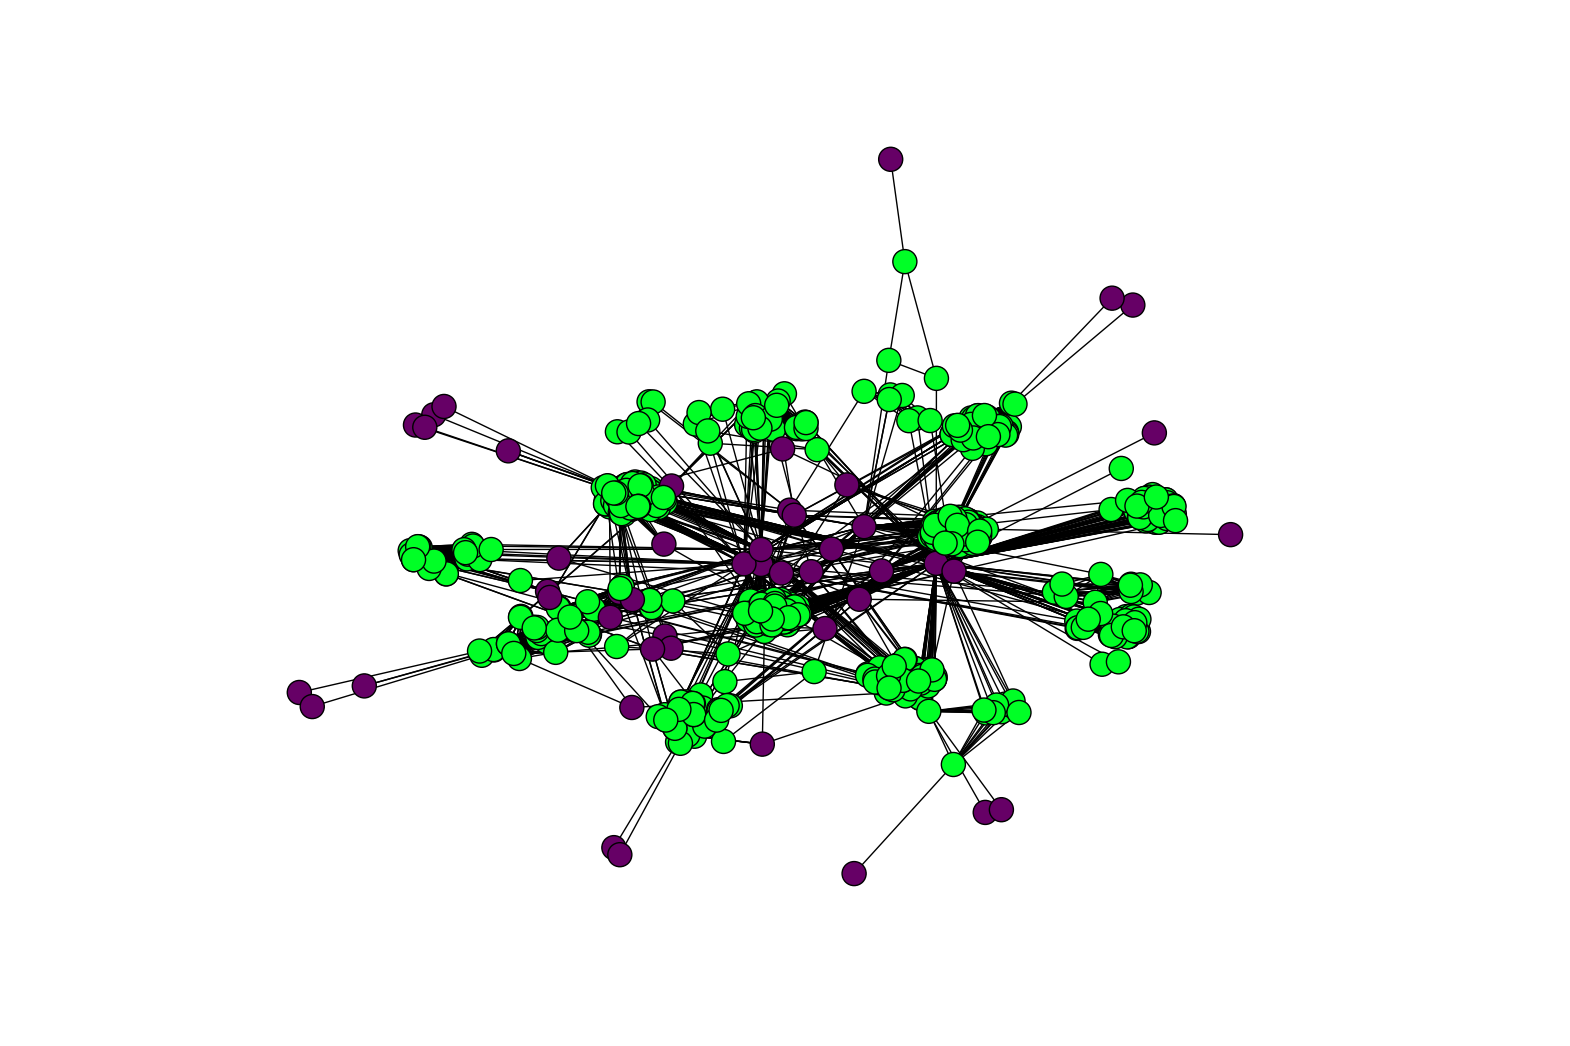

In [109]:
# draw Graph
plt.figure(figsize=(15,10))
color_map = {'Crime':'#00ff26', 'Location':'#660066'} 
#nx.draw_networkx(G)
nx.draw(G, node_color=[color_map[G.node[node]['category']] for node in G])
plt.show() 

In [149]:
# records.loc[:,['ID','case_number','block','primary_type','location_description']]
crimeList = crime['ID']
locationList = locations['ID']

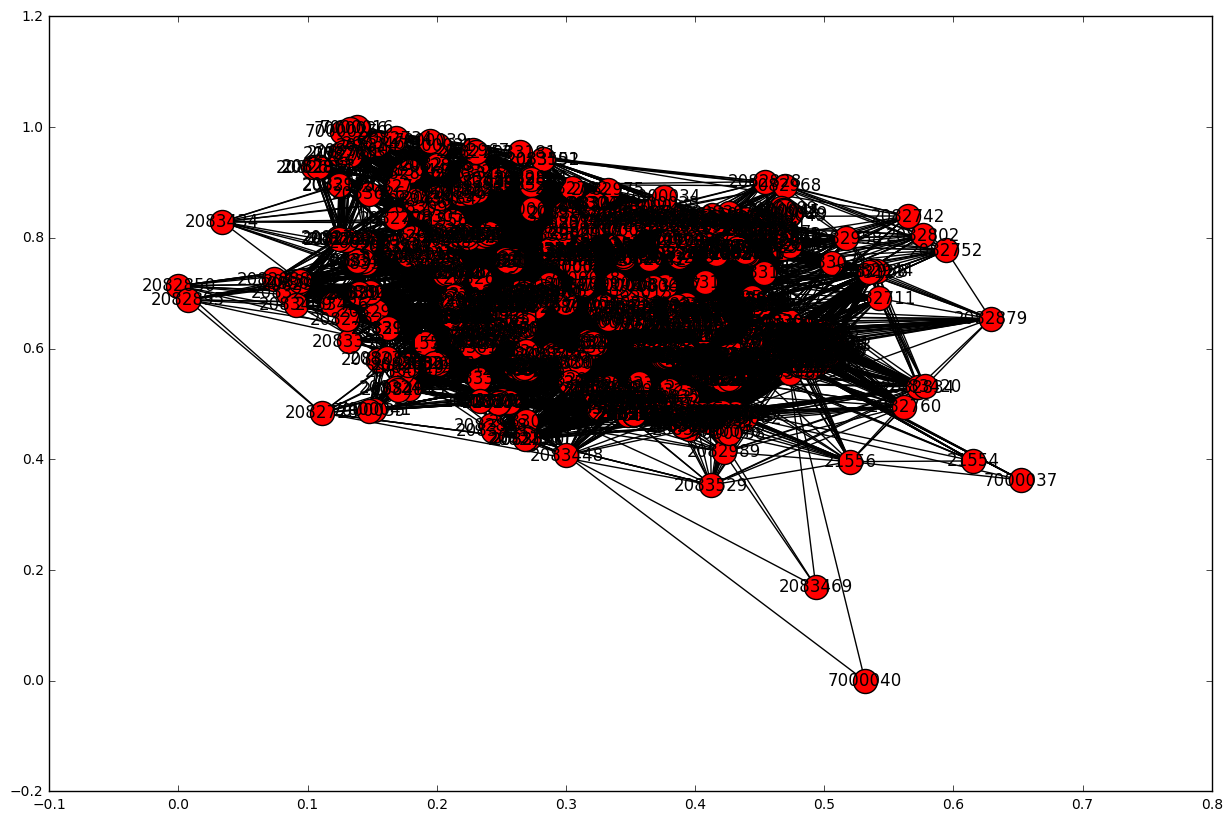

In [146]:
crime_projected = bi.projected_graph(G, crimeList)
plt.figure(figsize=(15,10))
nx.draw_networkx(crime_projected,with_labels=True)
plt.show()

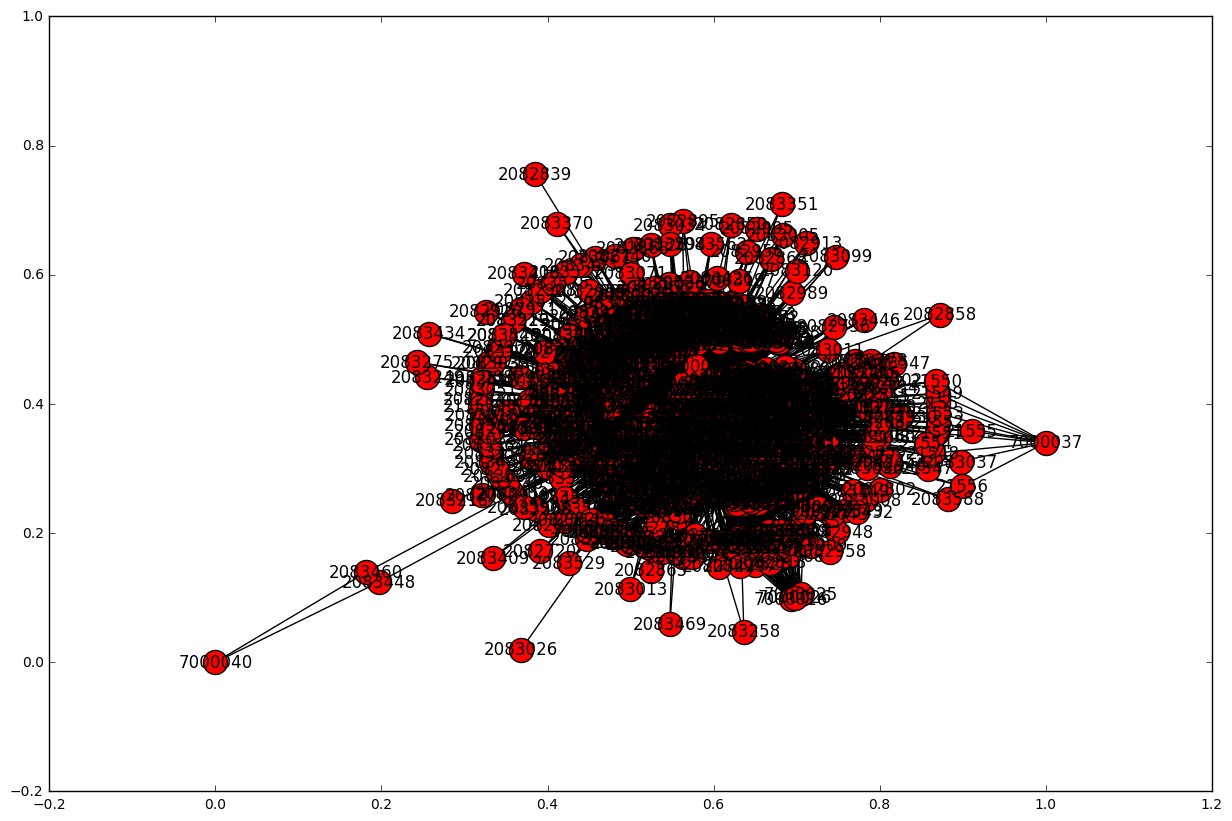

In [147]:
location_projected = bi.projected_graph(G, locationList)
plt.figure(figsize=(15,10))
nx.draw_networkx(location_projected,with_labels=True)
plt.show()

In [155]:
def trim_edges(g, weight=1):
    g2= nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2


def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [151]:
# create weighted graphs for cime and location nodes
crime_weighted = bi.weighted_projected_graph(G, crimeList, ratio=False)
location_weighted = bi.weighted_projected_graph(G, locationList, ratio=False)

In [174]:
# applying island method to each group
crime_thresholds = island_method(crime_weighted)
location_thresholds = island_method(location_weighted)

In [191]:
print 'threshold - ', crime_thresholds[5][0], ' size of graph' , len(crime_thresholds[5][1]), ' number of subgraphs' ,len(list(nx.connected_component_subgraphs(crime_thresholds[5][1])))

threshold -  191  size of graph 189  number of subgraphs 11


In [192]:
print 'threshold - ', location_thresholds[5][0], ' size of graph' , len(location_thresholds[5][1]), ' number of subgraphs' ,len(list(nx.connected_component_subgraphs(location_thresholds[5][1])))

threshold -  81  size of graph 194  number of subgraphs 1


In [199]:
# get Node Identifier from ID
def getNodIdentifier(nodeID):
    if(nodeID >= 7000000 and nodeID < 8000000):
        c = locations.loc[locations['ID'] == nodeID]
        return(c['location_description'].item())       
    else:
        c = crime.loc[crime['ID'] == nodeID]
        return(c['case_number'].item())

# Crime Group Analysis

Performingcentrality and degree analysis on crime and location graphs prior and post reduction

## Betweenness centrality

### Crime

In [202]:
# performing betweeness centrality analysis on the crime graph  piror to reduction
dg = nx.betweenness_centrality(crime_projected)
for key, value in dg.items():
    print getNodIdentifier(key),'-', value

HH306402 - 0.00118497966946
HH290357 - 4.0599432019e-05
HH308796 - 0.000878464051075
HH301695 - 0.000559573792528
HH241218 - 0.000750458090332
HH301068 - 8.36378545473e-05
HH310141 - 0.000295684583514
HH290313 - 4.27667525905e-05
HH309255 - 0.000128001249701
HH297332 - 0.000711966415297
HH309924 - 0.00138185323822
HH303299 - 0.000711966415297
HH306873 - 5.62290687186e-05
HH303605 - 0.000110633585356
HH298019 - 0.000711966415297
HH309372 - 0.000848289562617
HH309655 - 0.00266585282692
HH307641 - 0.000105636968829
HH308492 - 0.00266585282692
HH306353 - 0.00124166542763
HH309495 - 0.00138185323822
HH309658 - 4.01829604692e-08
HH297397 - 4.0599432019e-05
HH307997 - 0.000199872730422
HH308471 - 0.000262174646398
HH309122 - 0.000357779141364
HH307906 - 0.00118497966946
HH299068 - 0.000711966415297
HH310150 - 5.5238548518e-05
HH309976 - 0.00118497966946
HH303301 - 0.000711966415297
HH308499 - 1.33250221846e-05
HH303314 - 0.00054741179759
HH307585 - 0.000271594371777
HH310531 - 0.0021551257753

In [200]:
# performing betweeness centrality analysis on the crime graph  post reduction
dg = nx.betweenness_centrality(crime_thresholds[5][1])
for key, value in dg.items():
    print getNodIdentifier(key),'-', value

HH297818 - 0.0
HH297332 - 0.0
HH303299 - 0.0
HH298019 - 0.0
HH293503 - 0.0
HH297820 - 0.0
HH303278 - 0.0
HH299068 - 0.0
HH293615 - 0.0
HH298075 - 0.0
HH303301 - 0.0
HH303514 - 0.0
HH297833 - 0.0
HH303578 - 0.0
HH295494 - 0.0
HH298815 - 0.0
HH299400 - 0.0
HH303280 - 0.0
HH295560 - 0.0
HH303121 - 0.0
HH286024 - 0.0
HH301617 - 0.0
HH295206 - 0.0
HH293514 - 0.0
HH303917 - 0.0
HH300177 - 0.0
HH301561 - 0.0
HH294107 - 0.0
HH300104 - 0.0
HH285651 - 0.0
HH303199 - 0.0
HH300889 - 0.0
HH297855 - 0.0
HH300736 - 0.0
HH302247 - 0.0
HH298381 - 0.0
HH300632 - 0.0
HH297880 - 0.0
HH301246 - 0.0
HH303883 - 0.0
HH298290 - 0.0
HH293618 - 0.0
HH298894 - 0.0
HH297454 - 0.0
HH281759 - 0.0
HH299112 - 0.0
HH293619 - 0.0
HH298821 - 0.0
HH299996 - 0.0
HH297555 - 0.0
HH297503 - 0.0
HH297925 - 0.0
HH293620 - 0.0
HH302484 - 0.0
HH300346 - 0.0
HH297506 - 0.0
HH291782 - 0.0
HH297945 - 0.0
HH293624 - 0.0
HH289288 - 0.0
HH297948 - 0.0
HH293625 - 0.0
HH300415 - 0.0
HH297953 - 0.0
HH293627 - 0.0
HH298884 - 0.0
HH393382 -

## Location

In [203]:
# performing betweeness centrality analysis on the location graph  piror to reduction
dg = nx.betweenness_centrality(location_projected)
for key, value in dg.items():
    print getNodIdentifier(key),'-', value

HH306402 - 0.000134768303356
HH290357 - 2.60323436415e-06
HZ236858 - 6.91248598785e-05
HH301695 - 0.000179405310275
HH241218 - 0.000205613041286
HH301068 - 1.95318619264e-06
HH310141 - 1.9566509367e-05
HH290313 - 0.000171861264972
HH309255 - 0.000171861264972
HH297332 - 4.21072869197e-05
HH309924 - 6.91248598785e-05
HH303299 - 4.21072869197e-05
HH306873 - 1.75048472108e-05
HH303605 - 0.000134768303356
HH298019 - 4.21072869197e-05
HH309372 - 1.9566509367e-05
HH309655 - 0.000205613041286
HH307641 - 5.7048113243e-06
HH308492 - 0.000205613041286
HH306353 - 0.000179405310275
HH309495 - 6.91248598785e-05
HH309658 - 0.0
HH297397 - 2.60323436415e-06
HH307997 - 5.7048113243e-06
HH308471 - 0.000179405310275
HH309122 - 1.75048472108e-05
HH307906 - 0.000134768303356
HH299068 - 4.21072869197e-05
HH310150 - 0.000364461333889
HH309976 - 0.000134768303356
HH303301 - 4.21072869197e-05
HH308499 - 6.35413079436e-07
HH303314 - 6.91248598785e-05
HH307585 - 0.000205613041286
HH310531 - 0.000205613041286
HH3

In [204]:
# performing betweeness centrality analysis on the location graph  post reduction
dg = nx.betweenness_centrality(location_thresholds[5][1])
for key, value in dg.items():
    print getNodIdentifier(key),'-', value

HH297818 - 0.0
HH285651 - 0.0
HH297332 - 0.0
HH303299 - 0.0
HH298019 - 0.0
HH293503 - 0.0
HH297820 - 0.0
HH303278 - 0.0
HH299068 - 0.0
HH293615 - 0.0
HH298075 - 0.0
HH303301 - 0.0
HH303514 - 0.0
HH297833 - 0.0
HH303578 - 0.0
HH295494 - 0.0
HH303199 - 0.0
HH299400 - 0.0
HH303280 - 0.0
HH295560 - 0.0
HH303121 - 0.0
HH286024 - 0.0
HH301617 - 0.0
HH295206 - 0.0
HH293514 - 0.0
HH303917 - 0.0
HH300177 - 0.0
HH301561 - 0.0
HH294107 - 0.0
HH300104 - 0.0
HH300141 - 0.0
HH298815 - 0.0
HH300889 - 0.0
HH297855 - 0.0
HH300736 - 0.0
HH302247 - 0.0
HH298381 - 0.0
HH300632 - 0.0
HH297880 - 0.0
HH294296 - 0.0
HH303883 - 0.0
HH298290 - 0.0
HH293618 - 0.0
HH298894 - 0.0
HH297454 - 0.0
HH281759 - 0.0
HH299112 - 0.0
HH293619 - 0.0
HH298821 - 0.0
HH298185 - 0.0
HH299996 - 0.0
HH297555 - 0.0
HH297503 - 0.0
HH297925 - 0.0
HH293620 - 0.0
HH302484 - 0.0
HH300346 - 0.0
HH297506 - 0.0
HH291782 - 0.0
HH297945 - 0.0
HH293624 - 0.0
HH300379 - 0.0
HH297948 - 0.0
HH293625 - 0.0
HH300415 - 0.0
HH297953 - 0.0
HH293627 -

## Degree

### Location

In [206]:
# performing degree analysis on the location graph  piror to reduction
dg = nx.degree(location_projected)
for key, value in dg.items():
    print getNodIdentifier(key),'-', value

HH306402 - 13
HH290357 - 4
HZ236858 - 20
HH301695 - 22
HH241218 - 29
HH301068 - 4
HH310141 - 8
HH290313 - 16
HH309255 - 16
HH297332 - 15
HH309924 - 20
HH303299 - 15
HH306873 - 7
HH303605 - 13
HH298019 - 15
HH309372 - 8
HH309655 - 29
HH307641 - 6
HH308492 - 29
HH306353 - 22
HH309495 - 20
HH309658 - 1
HH297397 - 4
HH307997 - 6
HH308471 - 22
HH309122 - 7
HH307906 - 13
HH299068 - 15
HH310150 - 13
HH309976 - 13
HH303301 - 15
HH308499 - 3
HH303314 - 20
HH307585 - 29
HH310531 - 29
HH309768 - 16
HH309488 - 12
HH309286 - 2
HH306589 - 6
HH310315 - 20
HH310499 - 29
HH309355 - 29
HH297449 - 4
HH299400 - 15
HH301560 - 4
HH308698 - 20
HH285980 - 20
HH290362 - 4
HH310102 - 13
HH309588 - 20
HH310534 - 22
HH303727 - 4
HH300098 - 20
HH286024 - 15
HH301617 - 15
HH306672 - 13
HH305820 - 5
HH309446 - 29
HH301890 - 29
HH310483 - 22
HH310500 - 29
HH310541 - 22
HH303917 - 15
HH300177 - 15
HH310532 - 29
HH309053 - 13
HH301561 - 15
HH309788 - 29
HH308423 - 29
HH309365 - 28
HH308704 - 3
HH310520 - 29
HH309194 - 

In [205]:
# performing degree analysis on the location graph  post reduction
dg = nx.degree(location_thresholds[5][1])
for key, value in dg.items():
    print getNodIdentifier(key),'-', value

HH297818 - 1
HH285651 - 1
HH297332 - 1
HH303299 - 1
HH298019 - 1
HH293503 - 1
HH297820 - 1
HH303278 - 1
HH299068 - 1
HH293615 - 1
HH298075 - 1
HH303301 - 1
HH303514 - 1
HH297833 - 1
HH303578 - 1
HH295494 - 1
HH303199 - 1
HH299400 - 1
HH303280 - 1
HH295560 - 1
HH303121 - 1
HH286024 - 1
HH301617 - 1
HH295206 - 1
HH293514 - 1
HH303917 - 1
HH300177 - 1
HH301561 - 1
HH294107 - 1
HH300104 - 1
HH300141 - 1
HH298815 - 1
HH300889 - 1
HH297855 - 1
HH300736 - 1
HH302247 - 1
HH298381 - 1
HH300632 - 1
HH297880 - 1
HH294296 - 1
HH303883 - 1
HH298290 - 1
HH293618 - 1
HH298894 - 1
HH297454 - 1
HH281759 - 1
HH299112 - 1
HH293619 - 1
HH298821 - 1
HH298185 - 1
HH299996 - 1
HH297555 - 1
HH297503 - 1
HH297925 - 1
HH293620 - 1
HH302484 - 1
HH300346 - 1
HH297506 - 1
HH291782 - 1
HH297945 - 1
HH293624 - 1
HH300379 - 1
HH297948 - 1
HH293625 - 1
HH300415 - 1
HH297953 - 1
HH293627 - 1
HH298884 - 1
HH393382 - 1
HH302604 - 1
HH297963 - 1
HH281762 - 1
HH300960 - 1
HH298033 - 1
HH299158 - 1
HH293629 - 1
HH298670 - 1

### Crime

In [208]:
# performing degree analysis on the location graph  piror to reduction
dg = nx.degree(crime_projected)
for key, value in dg.items():
    print getNodIdentifier(key),'-', value

HH306402 - 321
HH290357 - 287
HH308796 - 296
HH301695 - 138
HH241218 - 224
HH301068 - 93
HH310141 - 80
HH290313 - 52
HH309255 - 59
HH297332 - 404
HH309924 - 389
HH303299 - 404
HH306873 - 29
HH303605 - 62
HH298019 - 404
HH309372 - 129
HH309655 - 405
HH307641 - 56
HH308492 - 405
HH306353 - 347
HH309495 - 389
HH309658 - 281
HH297397 - 287
HH307997 - 294
HH308471 - 104
HH309122 - 102
HH307906 - 321
HH299068 - 404
HH310150 - 34
HH309976 - 321
HH303301 - 404
HH308499 - 14
HH303314 - 219
HH307585 - 153
HH310531 - 226
HH309768 - 52
HH309488 - 33
HH309286 - 89
HH306589 - 294
HH310315 - 150
HH310499 - 405
HH309355 - 224
HH297449 - 287
HH299400 - 218
HH301560 - 289
HH308698 - 212
HH285980 - 219
HH290362 - 287
HH310102 - 321
HH309588 - 389
HH310534 - 347
HH303727 - 287
HH300098 - 389
HH286024 - 404
HH301617 - 209
HH306672 - 147
HH305820 - 40
HH309446 - 147
HH301890 - 405
HH310483 - 347
HH310500 - 145
HH310541 - 347
HH303917 - 404
HH300177 - 404
HH307769 - 54
HH310532 - 164
HH309053 - 147
HH301561 

In [207]:
# performing degree analysis on the location graph  post reduction
dg = nx.degree(crime_thresholds[5][1])
for key, value in dg.items():
    print getNodIdentifier(key),'-', value

HH297818 - 43
HH297332 - 83
HH303299 - 83
HH298019 - 83
HH293503 - 5
HH297820 - 83
HH303278 - 9
HH299068 - 83
HH293615 - 24
HH298075 - 5
HH303301 - 83
HH303514 - 24
HH297833 - 43
HH303578 - 83
HH295494 - 2
HH298815 - 9
HH299400 - 9
HH303280 - 83
HH295560 - 83
HH303121 - 83
HH286024 - 83
HH301617 - 2
HH295206 - 24
HH293514 - 24
HH303917 - 83
HH300177 - 83
HH301561 - 43
HH294107 - 5
HH300104 - 5
HH285651 - 1
HH303199 - 83
HH300889 - 5
HH297855 - 83
HH300736 - 5
HH302247 - 83
HH298381 - 83
HH300632 - 24
HH297880 - 83
HH301246 - 83
HH303883 - 83
HH298290 - 83
HH293618 - 24
HH298894 - 43
HH297454 - 2
HH281759 - 43
HH299112 - 83
HH293619 - 24
HH298821 - 2
HH299996 - 9
HH297555 - 83
HH297503 - 1
HH297925 - 83
HH293620 - 24
HH302484 - 1
HH300346 - 83
HH297506 - 9
HH291782 - 83
HH297945 - 83
HH293624 - 24
HH289288 - 43
HH297948 - 83
HH293625 - 24
HH300415 - 43
HH297953 - 3
HH293627 - 24
HH298884 - 83
HH393382 - 43
HH302604 - 83
HH298670 - 5
HH281762 - 43
HH300960 - 83
HH299158 - 83
HH293629 - 2